#### Obravnava problema nihanja s 2 PS ($x_1(t)$ in $x_2(t)$) ob vzbujanju $y(t)$ in uporabo konvolucijskega integrala

In [142]:
#! pip install ipynb --upgrade

In [2]:
#import numpy and matplotlib
import numpy as np;
import matplotlib.pyplot as plt;
import funkcije_seminar as f;

#use plot style seaborn
plt.style.use('seaborn');
colors = np.array(['#390099', '#9e0059', '#ff0054', '#ff5400', '#ffbd00', '#80ff72', '#00d084', '#00a3af']);


C:\Users\marko\AppData\Local\Temp\ipykernel_19356\1993208459.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


<img src="shema.jpg" width="400">

## Gibalna enačba problema (ne dušen sistem)

$$[\bf{M}] \cdot \{\ddot{x}\} + [\bf{D}] \cdot \{\dot{x}\} + [\bf{K}] \cdot \{x\} = \{ F(t)\}$$
$$[\bf{M}] \cdot \{\ddot{x}\} + [\bf{K}] \cdot \{x\} = \{ F(t)\}$$

##### Neodvisna spremenljivka $t$ in podatki - lastnosti sistema

In [3]:
t = f.neodvisna_spremenljivka_t(40);

In [5]:
m1 = 2;
k1 = 600;

m2 = 2;
k2 = 600;

M = f.mass_matrix(m1, m2);
K = f.stiffness_matrix(k1, k2);

print('M = ')
print(M)
print('K = ')
print(K)

M = 
[[2. 0.]
 [0. 2.]]
K = 
[[1200. -600.]
 [-600.  600.]]


## Lastne vrednosti, lastni vektorji

In [6]:
A = np.linalg.inv(M) @ K

eigenval, eigenvec = np.linalg.eig(A)
eigenvalues, eigenvectors = f.eig(eigenval, eigenvec)


eigenvalues
[10.70466269 28.02517077]
 
eigenvectors
[[ 0.85065081  0.52573111]
 [-0.52573111  0.85065081]]
[[ 0.52573111  0.85065081]
 [ 0.85065081 -0.52573111]]


In [11]:
eigenvectors

array([[ 0.52573111,  0.85065081],
       [ 0.85065081, -0.52573111]])

In [10]:
eigenvec

array([[ 0.85065081,  0.52573111],
       [-0.52573111,  0.85065081]])

In [14]:
vec1 = eigenvec[0, :]
vec1 = vec1/eigenvec[0][0]

vec2 = eigenvec[1, :]
vec2 = vec2/eigenvec[1][0]
vec1, vec2
vec = np.array([vec1[ -1, ], vec2[ -1]])
vec

array([ 0.61803399, -1.61803399])

In [147]:
print(f'{eigenvalues[0]:.3f} rad/s \t=>\t {eigenvectors[:,0]}')
print(f'{eigenvalues[1]:.3f} rad/s \t=>\t {eigenvectors[:,1]}')

0.315 rad/s 	=>	 [0.13259361 0.99117049]
5.479 rad/s 	=>	 [ 0.9999927  -0.00382211]


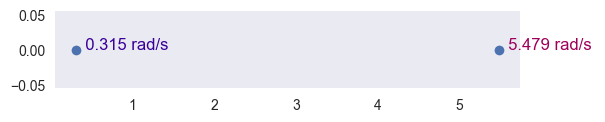

omega1 	 = 0.315 rad/s
omega2 	 = 5.479 rad/s


In [148]:
plt.figure(figsize=(6,1))
plt.grid()
plt.plot(eigenvalues.real, eigenvalues.imag, 'o')
for i in range(len(eigenvalues)):
    plt.text(eigenvalues[i].real, eigenvalues[i].imag, f'  {eigenvalues[i]:.3f} rad/s ', fontsize=12, color=colors[i])
#plt.axhline(0, color='k', lw=1, alpha=0.2)
plt.show()

omega1 = eigenvalues[0]
omega2 = eigenvalues[1]

print(f'omega1 \t = {omega1:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s')

C:\Users\marko\AppData\Local\Temp\ipykernel_16808\3423461170.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


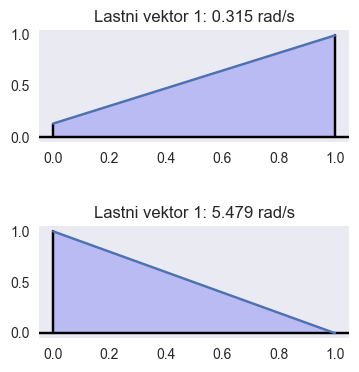

In [149]:
plt.figure(figsize=(4,4))
plt.title("Lastni vektorji")

plt.subplot(2,1,1)
plt.title(f'Lastni vektor 1: {eigenvalues[0]:.3f} rad/s')
plt.fill_between(np.arange(0,2), eigenvectors[:,0], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,0]], 'black')
plt.plot([1,1], [0, eigenvectors[1,0]], 'black')
plt.axhline(0, color='black')
plt.axhline(y=0, color='k', lw=0.2)
plt.grid()
plt.plot(eigenvectors[:,0])
# add horizontal space
plt.subplots_adjust(hspace=0.75)
plt.subplot(2,1,2)
plt.title(f'Lastni vektor 1: {eigenvalues[1]:.3f} rad/s')
plt.fill_between(np.arange(0,2), eigenvectors[:,1], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,1]], 'black')
plt.plot([1,1], [0, eigenvectors[1,1]], 'black')
# plt.ylim(0.95, 1.1)
plt.axhline(y=0, color='k')
plt.grid()
plt.plot(eigenvectors[:,1])


## Modalne mase in preverjanje $\omega_0$

In [150]:
modal_mass_m, modal_stiffness_m = f.modal_mass_stiffness(eigenvectors, M, K)
print('modal_mass_m = ')
print(modal_mass_m)
print("  ")
print('modal_stiffness_m = ')
print(modal_stiffness_m)

modal_mass_m = 
[[344.02243764   0.        ]
 [  0.          10.00496689]]
  
modal_stiffness_m = 
[[ 34.05724715   0.        ]
 [  0.         300.30196824]]


### Preverjanje $\omega_1$ in $\omega_2$

In [151]:
omega11 = np.sqrt(modal_stiffness_m[0,0]/modal_mass_m[0,0])
omega22 = np.sqrt(modal_stiffness_m[1,1]/modal_mass_m[1,1])

print(f'modal stiffness 1 \t = \t{modal_stiffness_m[0,0]:.3f} N/m')
print(f'modal mass 1 \t\t = \t{modal_mass_m[0,0]:.2f} kg')
print(f'omega1 \t\t\t = \t{omega11:.2f} rad/s')
print(" ")
print(f'modal stiffness 2 \t = \t{modal_stiffness_m[1,1]:.3f}')
print(f'modal mass 2 \t\t = \t{modal_mass_m[1,1]:.2f}')
print(f'omega2 \t\t\t = \t{omega22:.2f} rad/s')

modal stiffness 1 	 = 	34.057 N/m
modal mass 1 		 = 	344.02 kg
omega1 			 = 	0.31 rad/s
 
modal stiffness 2 	 = 	300.302
modal mass 2 		 = 	10.00
omega2 			 = 	5.48 rad/s


In [152]:
print(f'omega1 \t = {omega1:.3f} rad/s   \t\t omega11 \t = {omega11:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s \t\t\t omega22 \t = {omega22:.3f} rad/s')

omega1 	 = 0.315 rad/s   		 omega11 	 = 0.315 rad/s
omega2 	 = 5.479 rad/s 			 omega22 	 = 5.479 rad/s


## Definicija dušenja in $\omega_D$

In [153]:
d_krit1 = np.sqrt(k1/m1)
d_krit2 = np.sqrt(k2/m2)
delta1 = 0.15;
delta2 = 0.2;
print(f'delta1 = {delta1:.2f} \t delta1_krit = {d_krit1:.2f}')
print(f'delta2 = {delta2:.2f} \t delta2_krit = {d_krit2:.2f}')

delta1 = 0.15 	 delta1_krit = 5.10
delta2 = 0.20 	 delta2_krit = 0.34


In [154]:
omega1D = omega1 * np.sqrt(1 - delta1**2)
omega2D = omega2 * np.sqrt(1 - delta2**2)
print(f'omega1 = {omega1:.2f} rad/s')
print(f'omega1D = {omega1D:.2f} rad/s')
print(" ")
print(f'omega2 = {omega2:.2f} rad/s')
print(f'omega2D = {omega2D:.2f} rad/s')

omega1 = 0.31 rad/s
omega1D = 0.31 rad/s
 
omega2 = 5.48 rad/s
omega2D = 5.37 rad/s


## Izpis prvega dela

In [155]:
print("M: ")
print(M)
print("K: ")
print(K)
print(" ")
print("Lastne frekvence in vektorji: ")
print(f'{eigenvalues[0]:.3f} rad/s \t => \t {eigenvectors[:,0]}')
print(f'{eigenvalues[1]:.3f} rad/s \t => \t {eigenvectors[:,1]}')


M: 
[[ 10.   0.]
 [  0. 350.]]
K: 
[[300. -40.]
 [-40.  40.]]
 
Lastne frekvence in vektorji: 
0.315 rad/s 	 => 	 [0.13259361 0.99117049]
5.479 rad/s 	 => 	 [ 0.9999927  -0.00382211]


## Definicija vzbujanja

(0.0, 5.0)

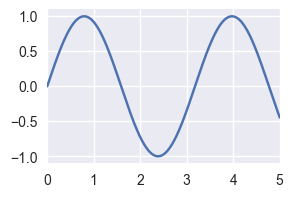

In [156]:
ff = omega1;
y = np.sin(2 * np.pi * ff * t)
t1 = 1/(2*ff);
plt.figure(figsize=(3,2))
plt.plot(t, y)
plt.xlim(0, 5)

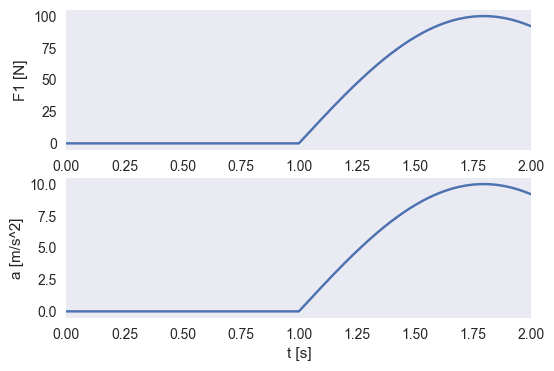

In [157]:
F = np.zeros_like(t)
F0 = 100; #N
t0 = 1; #po 1 sekundi

T1 = t1 - t1 % (t[1] - t[0])
t_index = np.where(t == T1)
t2 = t0 * 1000 + t_index[0][0]


F[t0 * 1000:t2] = y[:t_index[0][0]] * F0

plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.xlabel('t [s]')
plt.ylabel('F1 [N]')
plt.plot(t, F, label='Vzbujevalja sila')
plt.xlim(0, 2)
plt.grid()

plt.subplot(2,1,2)
plt.xlabel('t [s]')
plt.ylabel('a [m/s^2]')
plt.plot(t, F/m1, label='pospešek mase 1')
plt.xlim(0, 2)
plt.grid()

Zgoraj definiramo vzbujanje postavimo v prvo vrstico vektorja $F(t)$, saj je to vzbujanje na masi $m_1$

In [158]:
Ft = np.zeros((2, len(t)))
Ft[0,:] = F
print(Ft[0, 1000:1005])
print(Ft[1, 1000:1005])

[0.         0.19769285 0.39538494 0.59307547 0.79076369]
[0. 0. 0. 0. 0.]


Pri prehodu v modalne koordinate:
$$leva \ stran = [\Phi]^T \cdot \{ F(t)\}

In [159]:
Modal_Ft = eigenvectors.T @ Ft
print(Modal_Ft[0, 1000:1005])
print(Modal_Ft[1, 1000:1005])

[0.         0.02621281 0.05242552 0.07863802 0.10485021]
[0.         0.19769141 0.39538205 0.59307114 0.79075791]


Zakaj se pri modalni transformaciji te matrike več prevede na telo 2 ne glede na frekvenco vzbujanja?

## Konvolucija

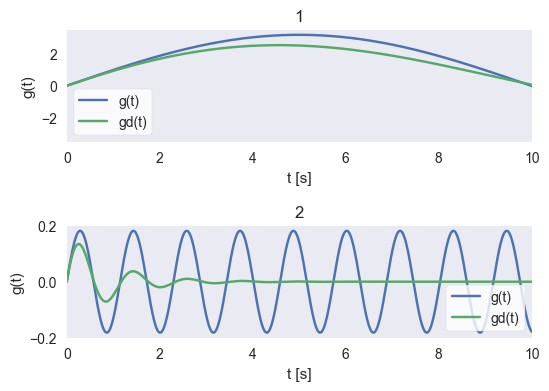

In [160]:
g_1 = 1/omega1 * np.sin(omega1 * t)
g_2 = 1/omega2 * np.sin(omega2 * t)

g_1d = 1/omega1 * np.exp(-delta1 * omega1 * t) * np.sin(omega1D * t)
g_2d = 1/omega2 * np.exp(-delta2 * omega2 * t) * np.sin(omega2D * t)

plot1 = plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.title("1")
plt.xlim(0, 10)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_1)
plt.plot(t, g_1d) 
plt.grid()
plt.legend(['g(t)', 'gd(t)'], frameon=True, facecolor='white')
plt.subplot(2,1,2)
#add empty space between subplots
plt.subplots_adjust(hspace=0.75)
plt.title("2")
plt.xlim(0, 10)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_2)
plt.plot(t, g_2d)
plt.grid()
plt.legend(['g(t)', 'gd(t)'], frameon=True, facecolor='white')

### Izračun $\xi_1$ in $\xi_2$ in začetni pogoji

In [161]:
#1
eta1 = np.convolve(Modal_Ft[0,:], g_1) * (t[1] - t[0])
eta1d = np.convolve(Modal_Ft[0,:], g_1d) * (t[1] - t[0])

#2
eta2 = np.convolve(Modal_Ft[1,:], g_2) * (t[1] - t[0])
eta2d = np.convolve(Modal_Ft[1,:], g_2d) * (t[1] - t[0])

eta = np.zeros((2, 2*len(t) - 1))
eta[0,:] = eta1
eta[1,:] = eta2

etaD = np.zeros((2, 2*len(t) - 1))
etaD[0,:] = eta1d
etaD[1,:] = eta2d

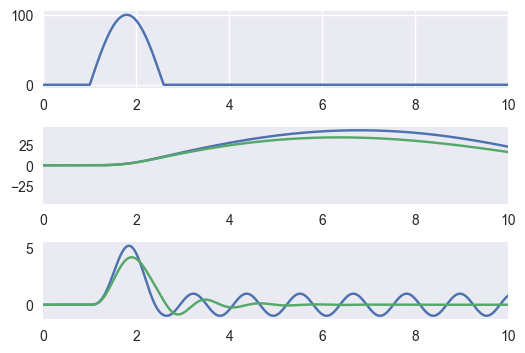

In [162]:
plt.figure(figsize=(6,4))

plt.subplot(3,1,1)
plt.plot(t, Ft[0])
plt.xlim(0, 10)

plt.subplot(3,1,2)
plt.xlim(0, 10)
plt.plot(t, eta1[:len(t)])
plt.plot(t, eta1d[:len(t)])
plt.grid()
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,3)
plt.xlim(0, 10)
plt.plot(t, eta2[:len(t)])
plt.plot(t, eta2d[:len(t)])
plt.grid()

In [163]:
# plt.figure(figsize=(9,2))
# plt.title(r'Dušen odziv $\xi$')
# plt.xlim(0, 10)
# plt.plot(t, eta1d[:len(t)], label='eta1d')
# plt.plot(t, eta2d[:len(t)], label='eta2d')
# plt.legend()

In [164]:
# #plot eta1, eta2 
# plt.figure(figsize=(8,6))

# #range axis
# plt.subplot(3,1,1)
# plt.plot(t, Ft[0], label='F1')
# plt.legend()
# plt.subplots_adjust(hspace=0.75)

# plt.subplot(3,1,2)
# plt.xlim(0, 20)
# plt.plot(t, eta1[:len(t)], label='eta1')
# plt.plot(t, eta1d[:len(t)], label='eta1d')
# plt.legend()
# plt.subplots_adjust(hspace=0.75)

# plt.subplot(3,1,3)
# plt.xlim(0, 20)
# plt.plot(t, eta2[:len(t)] ,label='eta2')
# plt.plot(t, eta2d[:len(t)], label='eta2d')
# plt.legend()

## Iz modalnega prostora nazaj v realnega

$$\{x(t)\}=[\Phi] \cdot \{\xi(t)\}$$

In [165]:
eigenvectors[:,0] #prvi lastni vektor

array([0.13259361, 0.99117049])

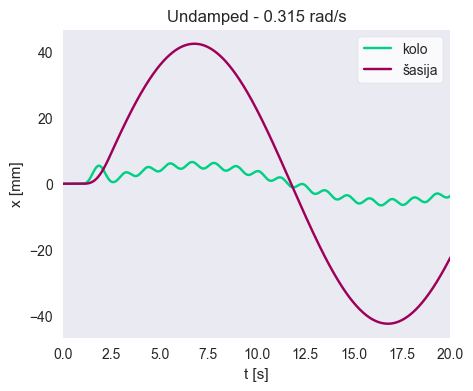

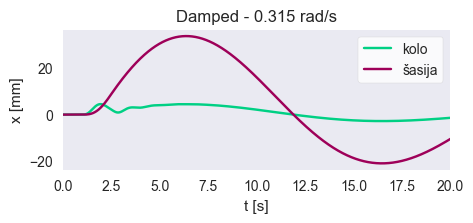

In [166]:
v_pom = 0
x1_1 = eigenvectors[:,0] @ eta
x1_2 = eigenvectors[:,1] @ eta

x1_1D = eigenvectors[:,0] @ etaD
x1_2D = eigenvectors[:,1] @ etaD

#plot x1_1 and x1_2
plt.figure(figsize=(5,4))
plt.title(f'Undamped - {ff:.3f} rad/s')
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [mm]')
plt.plot(t, x1_1[:len(t)], color = colors[6])
plt.plot(t, v_pom + x1_2[:len(t)], color = colors[1])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# plt.savefig(f'./x_{ff}rad_s.png', dpi=300)

#plot x1_1D and x1_2D
plt.figure(figsize=(5,4))
plt.subplot(2,1,1)
plt.title(f'Damped - {ff:.3f} rad/s')
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [mm]')
plt.plot(t, x1_1D[:len(t)], color = colors[6])
plt.plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#save figure
# plt.savefig(f'./xD_{ff}rad_s.png', dpi=300)


In [167]:
# create x11 and x12 as second derivatives of x1_1 and x1_2
a11 = np.zeros(len(t))
a12 = np.zeros(len(t))
a11D = np.zeros(len(t))
a12D = np.zeros(len(t))
# create a11 as second derivatives of a1_1
for i in range(1, len(t)-1):
    a11[i] = (x1_1[i+1] - 2*x1_1[i] + x1_1[i-1]) / (t[i+1] - t[i])**2
    a12[i] = (x1_2[i+1] - 2*x1_2[i] + x1_2[i-1]) / (t[i+1] - t[i])**2
    a11D[i] = (x1_1D[i+1] - 2*x1_1D[i] + x1_1D[i-1]) / (t[i+1] - t[i])**2
    a12D[i] = (x1_2D[i+1] - 2*x1_2D[i] + x1_2D[i-1]) / (t[i+1] - t[i])**2


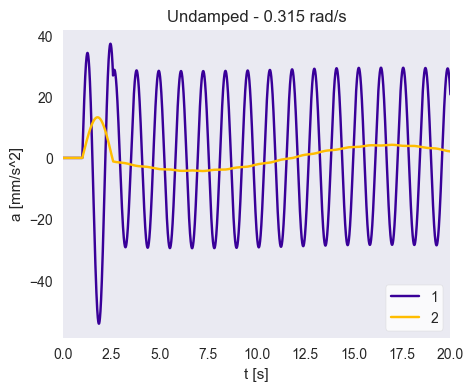

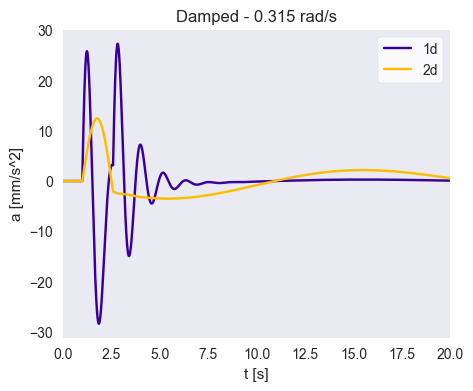

In [168]:
# plot x11 and x12
plt.figure(figsize=(5, 4))
plt.title(f'Undamped - {ff:.3f} rad/s')
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('a [mm/s^2]')
plt.plot(t, a11[:len(t)], color=colors[0])
plt.plot(t, a12[:len(t)], color=colors[4])
plt.grid()
plt.legend(['1', '2'], frameon=True, facecolor='white')

# plot x11D and x12D
plt.figure(figsize=(5, 4))
plt.title(f'Damped - {ff:.3f} rad/s')
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('a [mm/s^2]')
plt.plot(t, a11D[:len(t)], color=colors[0])
plt.plot(t, a12D[:len(t)], color=colors[4])
plt.grid()
plt.legend(['1d', '2d'], frameon=True, facecolor='white')


## Skupni izris

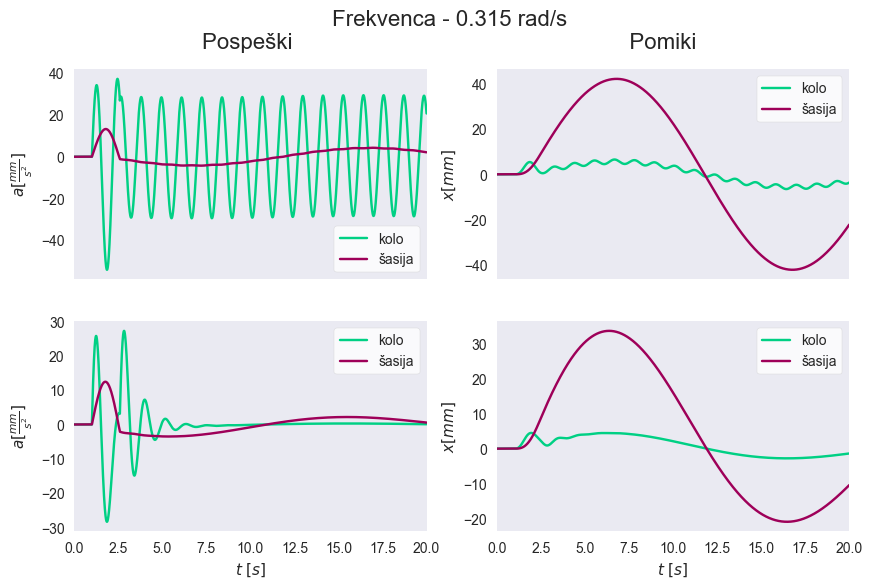

In [169]:
#create figure with 2 rows and 2 columns plots
fig, axs = plt.subplots(2, 2, figsize=(10,6))

# plt.subplots_adjust(bottom=0.5, top=2.9)
#set title
fig.suptitle(f'Frekvenca - {ff:.3f} rad/s\n', fontsize=12)
#limit x
axs[0, 0].set_xlim(0, 20)
axs[1, 0].set_xlim(0, 20)

#set x and y labels
axs[0, 0].set_ylabel(r'$a [\frac{mm}{s^2}]$')
axs[1, 0].set_ylabel(r'$a [\frac{mm}{s^2}]$')
# remove x ticks
axs[0, 0].set_xticks([]) 
axs[0, 1].set_xticks([])
#plot x1_1 and x1_2
axs[0, 0].plot(t, a11[:len(t)], color = colors[6])
axs[0, 0].plot(t, v_pom + a12[:len(t)], color = colors[1])
axs[0, 0].grid()
axs[0, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#plot x1_1D and x1_2D
axs[1, 0].plot(t, a11D[:len(t)], color = colors[6])
axs[1, 0].plot(t, v_pom + a12D[:len(t)], color = colors[1])
axs[1, 0].grid()
axs[1, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')


#set title
fig.suptitle(f'Frekvenca - {ff:.3f} rad/s\nPospeški                                                       Pomiki', fontsize=16)
#limit x
axs[0, 1].set_xlim(0, 20)
axs[1, 1].set_xlim(0, 20)
#set x and y labels
plt.subplots_adjust(hspace=0.2)
axs[1, 0].set_xlabel(r'$t \ [s]$')
axs[0, 1].set_ylabel(r'$x  [mm]$')
axs[1, 1].set_xlabel(r'$t \ [s]$')
axs[1, 1].set_ylabel(r'$x  [mm]$')
#plot x1_1 and x1_2
axs[0, 1].plot(t, x1_1[:len(t)], color = colors[6])
axs[0, 1].plot(t, v_pom + x1_2[:len(t)], color = colors[1])
axs[0, 1].grid()
axs[0, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#plot x1_1D and x1_2D
axs[1, 1].plot(t, x1_1D[:len(t)], color = colors[6])
axs[1, 1].plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
axs[1, 1].grid()
axs[1, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#save figure
# f_z = ff with 3 decimal places
f_z = f'{ff:.3f}'
plt.savefig(f'./rez_m1_{m1}_{f_z}_rad_s.png', dpi=300)